### PYTHON-13. Визуализация данных. Задания 9.1 - 9.10

In [67]:
import pandas as pd
churn_data = pd.read_csv('H:\SkillFactory\папка с файлами для работы\churn.csv')
churn_data.head()
#churn_data.shape
#churn_data.describe().loc[:,['Balance']]
#mask = churn_data['Balance'] >2500



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 9.1.
Каково соотношение ушедших и лояльных клиентов *(Exited)*? Покажите это на графике и дайте комментарий по соотношению.

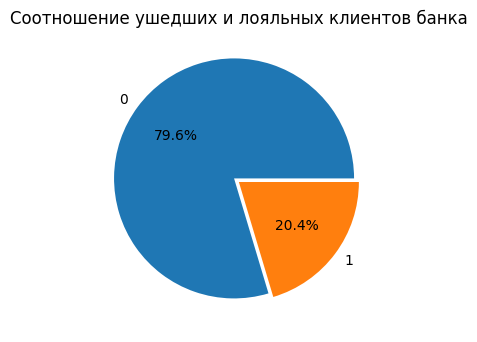

In [25]:
import matplotlib.pyplot as plt
churn_data = pd.read_csv('H:\SkillFactory\папка с файлами для работы\churn.csv')

ex_data = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
plt.title('Соотношение ушедших и лояльных клиентов банка')
axes.pie(
    ex_data,
    labels=ex_data.index,
    autopct='%.1f%%',
    explode = [0.05, 0],
);


* Вывод: Cоотношение ушедших (1) и лояльных (0) клиентов составляет:
* лояльных (0) = 79.6 %
* ушедших (1) = 20.4 %

-> Для банка потеря клиентов в таком масштабе не критична, но нужно предпринять меры по уменьшению этого процента, введением бонусных мер для новых клиентов.

# 9.2.
Постройте график, показывающий распределение баланса пользователей *(Balabce)*, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

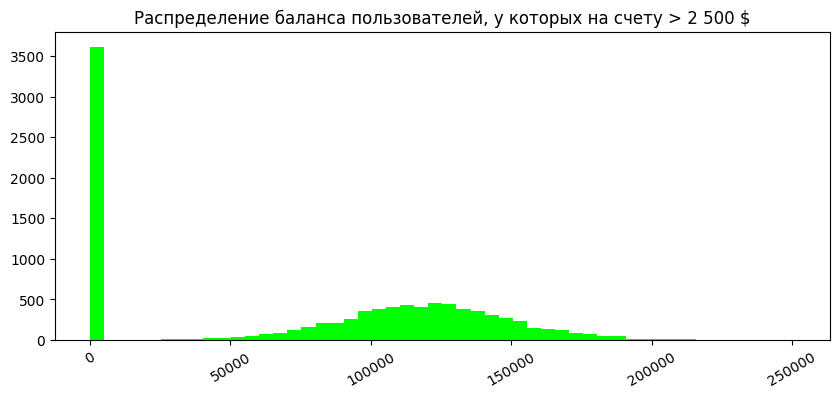

In [41]:
import matplotlib.pyplot as plt
churn_data = pd.read_csv('H:\SkillFactory\папка с файлами для работы\churn.csv')

filter_balance = churn_data[churn_data['Balance'] > 2500]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
axes.hist(
    x=churn_data["Balance"],
    color="lime",
    bins=50
)
axes.set_title('Распределение баланса пользователей, у которых на счету > 2 500 $')
axes.xaxis.set_tick_params(rotation=30)

* Вывод: Высокий столбец расположенный в начале графика указывает на то что, основная масса пользователей c балансом > 2500$, имеет на счетах не более 5000$. Остальные пользователь имеют на балансе в среднем ~ 130 000$.

# 9.3.
Посмотрите на распределение баланса клиента *(Balance)* в разрезе признака оттока *(Exited)*. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [79]:
import plotly
import plotly.express as px
churn_data = pd.read_csv('H:\SkillFactory\папка с файлами для работы\churn.csv')

#считаем суммы на накопительном счёте ушедших(1) и лояльных клиентов(0)
bar_data = churn_data.groupby(
    by='Exited',
    as_index=False
)[['Balance']].sum().round(2).nlargest(10, columns=['Balance'])

#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="Exited", #ось x
    y="Balance", #ось y
    color='Exited', #расцветка
    text = 'Balance', #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=600, #ширина
    title='Суммы на счетах ушедших(1) и лояльных(0) клиентов' #заголовок
)

#отображаем его
fig.show()

* Вывод: Суммы на счетах Лояльны(0) клиентов в 3 раза больше чем у ушедших(1).
Ушедших клиентов может неустраивать низкая процентная ставкана на их накопительных счетах.

# 9.4.
Посмотрите на распределение возраста *(Age)* в разрезе признака оттока *(Exited)*. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [98]:
import plotly
import plotly.express as px
churn_data = pd.read_csv('H:\SkillFactory\папка с файлами для работы\churn.csv')

fig1 = px.histogram(
    data_frame=churn_data, 
    x='Age', #ось абсцисс
    color='Exited', #расцветка
    height=500, #высота
    width=700, #ширина
    histfunc='count',
    title='Распределение возраста клиентов: ушедшие (1), лояльные (0)', 
    nbins = 33
)

fig2 = px.box(
    data_frame=churn_data,
    x='Age', #ось абсцисс
    color='Exited',  #расцветка
    height=500, #высота
    width=700, #ширина
    title='Распределение возраста клиентов: ушедшие (1), лояльные (0)', 
)
fig1.show()
fig2.show()

37.0

* Вывод: Лояльные(0) клиетны моложе ушедших(1). Потенциальных выбросов больше в группе клиетов возрастной категории 45-49 лет (count=410). Банку стоит обратить внимание на клиентов в возрастной категории 45-49 лет в виде пониженной процентной ставки по кредитам

# 9.5.
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента *(CreditScore)* и его предполагаемой зарплаты *(EstimatedSalary)*. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [22]:
import plotly
import plotly.express as px
churn_data = pd.read_csv('H:\SkillFactory\папка с файлами для работы\churn.csv')

#фильтруем таблицу по признакам
credit_salary_data  = churn_data.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].median()

#строим график
fig = px.scatter_3d(
    data_frame=credit_salary_data, #DataFrame
    x = 'EstimatedSalary', #ось абсцисс
    y = 'CreditScore', #ось ординат
    z = 'Exited', #ось аппликат
    color='Exited', #расцветка по признаку оттока
    log_x=True, 
    log_y=True,
    width=700,
    height=700,
    title='Зависимость крединого рейтинга от предполагаемой заработной платы'
)

#отображаем график
fig.show()

* Вывод: На представленной диаграмме точки разбросаны хаотично, что означает отсутствие взаимосвязей между предполгаемой заработной платой и кредитным рейтингом. Зависимость признака оттока от двух этих признаков так же определить невозможно

# 9.6.
Кто чаще уходит *(Exited)*, мужчины или женщины *(Gender)*? Постройте график, который иллюстрирует это.


In [9]:
import plotly
import plotly.express as px
churn_data = pd.read_csv('H:\SkillFactory\папка с файлами для работы\churn.csv')

gender_counts = churn_data['Gender'].value_counts() 
display(gender_counts)

values = "Всего клиентов:",[sum(gender_counts)]
display(values)

exited_male = churn_data[churn_data['Gender'] == 'Male']['Exited'].value_counts()
exited_female = churn_data[churn_data['Gender'] == 'Female']['Exited'].value_counts()
display('Male: % ушедших(1) и лояльных(0)', round(exited_male/100,0))
display('Female: % ушедших(1) и лояльных(0)', round(exited_female/100,0))


fig = px.histogram(
    data_frame=churn_data, 
    x='Gender', #ось абсцисс
    color='Exited', #расцветка
    pattern_shape ='Gender',
    height=500, #высота
    width=700, #ширина
    histfunc='count',
    text_auto=True,
    title='Соотношение лояльности полов клиентов: ушедшие (1), лояльные (0)', 
    nbins = 33
)

fig.show()


Male      5457
Female    4543
Name: Gender, dtype: int64

('Всего клиентов:', [10000])

'Male: % ушедших(1) и лояльных(0)'

0    46.0
1     9.0
Name: Exited, dtype: float64

'Female: % ушедших(1) и лояльных(0)'

0    34.0
1    11.0
Name: Exited, dtype: float64

* Вывод: На представленной диаграмме видно что Мужчины более лояльны чем Женщины. Чаще уходят женщины.

# 9.7.
Как отток клиентов *(Exited)* зависит от числа приобретённых у банка услуг *(NumOfProducts)*? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [83]:
import pandas as pd
import plotly
import plotly.express as px
churn_data = pd.read_csv('H:\SkillFactory\папка с файлами для работы\churn.csv')

#считаем суммы ушедших клиентов банка, приобретавшие разные его услуги
bar_data = churn_data.groupby(
    by='NumOfProducts',
    as_index=False       
)[['Exited']].sum().nlargest(10, columns=['Exited'])
display("число услуг приобретённых ушедшими клиентами:", bar_data)

percent_exited_clients = round(bar_data * 100 / bar_data.sum(), 0)
display("% услуг приобретённых ушедшими клиентами:", percent_exited_clients)

#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="NumOfProducts", #ось x
    y="Exited", #ось y
    color='NumOfProducts', #расцветка в зависимости от услуги
    text = 'Exited', #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=700, #ширина
    title='Зависимость оттока клиентов от числа приобретённых у банка услуг' #заголовок
)

#отображаем его
fig.show()

'число услуг приобретённых ушедшими клиентами:'

,NumOfProducts,Exited
0,1,1409
1,2,348
2,3,220
3,4,60


'% услуг приобретённых ушедшими клиентами:'

,NumOfProducts,Exited
0,10.0,69.0
1,20.0,17.0
2,30.0,11.0
3,40.0,3.0


* Вывод: из диаграммы видно, что 69 % ушедших клиентов приобретали банковскую услугу (№ 1). Банку следует пересмотреть условия услуги № 1, чтобы снизить отток клиентов.

9.8. Как влияет наличие статуса активного клиента *(IsActiveMember)* на отток клиентов *(Exited)*? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [84]:
import pandas as pd
import plotly
import plotly.express as px
churn_data = pd.read_csv('H:\SkillFactory\папка с файлами для работы\churn.csv')

fig = px.histogram(
    data_frame=churn_data, 
    x='IsActiveMember', #ось абсцисс
    color='Exited', #расцветка
    height=400, #высота
    width=600, #ширина
    histfunc='count',
    text_auto=True,
    title='Влияние наличия статуса активного клиента на отток клиентов', 
    nbins = 5
)
#отображаем его
fig.show()

* Вывод: На диаграмме заметно, что отсутствие активностивного статуса у клиента, повышает вероятность стать ему "ушедшим" клиентом. В группе со статусом активного клиента имеется выброс всего 735 человек, а в группе с неактивным статусом, выброс составил уже 1302 клиента. Чтобы сократить ОТТОК среди неактивных клиентов, банку нужно мотивировать неактивных клиентов беспроцентными рассрочками и прочими "плюшками".

# 9.9.
В какой стране *(Geography)* доля ушедших клиентов больше *(Exited)*? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [17]:
import plotly
import plotly.express as px
churn_data = pd.read_csv('H:\SkillFactory\папка с файлами для работы\churn.csv')

# Группируем данные по странам и рассчитываем среднее значение оттока:    
country = churn_data.groupby(['Geography'], as_index=False).agg({'Exited':'mean'})

# Строим тепловую картограмму:
fig = px.choropleth(
    data_frame=country, #DataFrame
    locations='Geography', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    hover_name='Geography',
    range_color=[0, 0.4], #диапазон цвета
    title='Доля ушедших клиентов по странам', #заголовок
    width=700, #ширина
    height=500, #высота
    color_continuous_scale=px.colors.sequential.Plasma #палитра цветов
)

#отображаем график
fig.update_geos(fitbounds='locations')
fig.show()

* Вывод: В Германии самая высокая доля ушедших клиентов. Предположительно, это может быть связано с тем что в германии есть банки с более привлекательными для клиентов банковскими продуктами.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


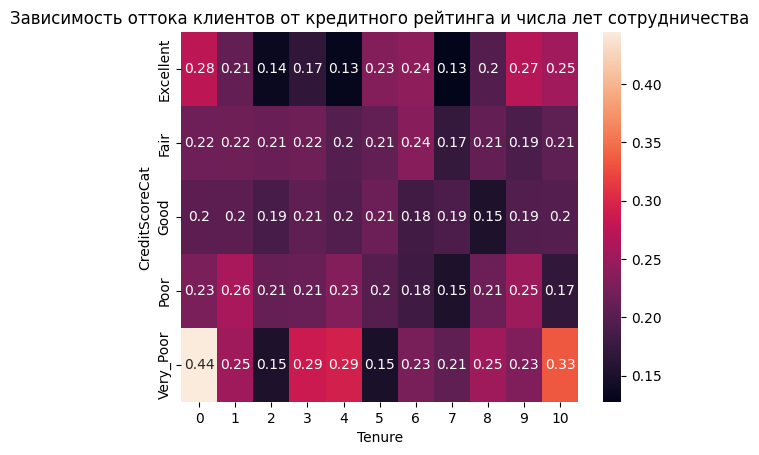

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
churn_data = pd.read_csv('H:\SkillFactory\папка с файлами для работы\churn.csv')

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot = churn_data.pivot_table(
    values='Exited',    
    index='CreditScoreCat',
    columns='Tenure',
)

fig = plt.figure()
ax = sns.heatmap(data=pivot, annot=True);
ax.set_title('Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества');

display(pivot)

* Вывод: Категории клиентов, которые уходят чаще всего обозначены на диаграмме светлыми оттенками, в диапазоне от 0.33 до 0.44